In [1]:
#Carga de archivos asociados a compras_items de eda 
# Librerías necesarias
import pandas as pd
from pathlib import Path

# Definir ruta base desde notebooks
ruta_base = Path("../data/raw")

# Lista de archivos a cargar (ajustar si hay más)
archivos_compras_items = [
    "compras_dcto_items_2019.xlsx",
    "compras_dcto_items_2020.xlsx",
    "compras_dcto_items_2021.xlsx",
    "compras_dcto_items_2022.xlsx",
    "compras_dcto_items_2023.xlsx",
    "compras_dcto_items_2024.xlsx",
    "compras_dcto_items_2025.xlsx"
]

# Cargar archivos
dfs_items = []
for archivo in archivos_compras_items:
    path = ruta_base / archivo
    try:
        df_temp = pd.read_excel(path, engine='openpyxl')
        dfs_items.append(df_temp)
        print(f"✅ Cargado: {archivo} → shape: {df_temp.shape}")
    except Exception as e:
        print(f"❌ Error cargando {archivo}: {e}")

# Consolidar en un único DataFrame
if dfs_items:
    df_compras_items = pd.concat(dfs_items, ignore_index=True)
    print(f"\n🧩 DataFrame consolidado: shape {df_compras_items.shape}")
else:
    print("❗No se cargaron archivos correctamente.")


✅ Cargado: compras_dcto_items_2019.xlsx → shape: (5873, 14)
✅ Cargado: compras_dcto_items_2020.xlsx → shape: (5087, 14)
✅ Cargado: compras_dcto_items_2021.xlsx → shape: (5966, 14)
✅ Cargado: compras_dcto_items_2022.xlsx → shape: (6065, 14)
✅ Cargado: compras_dcto_items_2023.xlsx → shape: (8143, 14)
✅ Cargado: compras_dcto_items_2024.xlsx → shape: (7619, 14)
✅ Cargado: compras_dcto_items_2025.xlsx → shape: (1665, 14)

🧩 DataFrame consolidado: shape (40418, 14)


In [2]:
# Ver columnas y tipos
print("Columnas y tipos de dato:")
print(df_compras_items.dtypes)

# Ver primeros valores
print("\nPrimeros valores por columna:")
print(df_compras_items.head(3).T)


Columnas y tipos de dato:
cod_cliente                         object
cliente                             object
documento                           object
defecha                     datetime64[ns]
cod_articulo_servicio               object
nombre_articulo_servicio            object
cantidad                           float64
porc_iva                             int64
vrgravado                          float64
vrnogravado                        float64
descuento                            int64
subtotal                           float64
tipodocumento                       object
tipotercero                         object
dtype: object

Primeros valores por columna:
                                                     0  \
cod_cliente                           PR  100000000175   
cliente                                   HAKUZAI LTDA   
documento                                 40     38306   
defecha                            2019-01-01 00:00:00   
cod_articulo_servicio                

Este bloque de código tiene como objetivo consolidar múltiples archivos de compras históricas en un único DataFrame para su análisis posterior.


In [2]:
#Revision inicial del dataset asociado con las compras 
# Información general
df_compras_items.info()

# Ver primeras filas
df_compras_items.head()

# Ver columnas
df_compras_items.columns.tolist()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40418 entries, 0 to 40417
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   cod_cliente               40418 non-null  object        
 1   cliente                   40418 non-null  object        
 2   documento                 40418 non-null  object        
 3   defecha                   40418 non-null  datetime64[ns]
 4   cod_articulo_servicio     40418 non-null  object        
 5   nombre_articulo_servicio  40418 non-null  object        
 6   cantidad                  40418 non-null  float64       
 7   porc_iva                  40418 non-null  int64         
 8   vrgravado                 40418 non-null  float64       
 9   vrnogravado               40418 non-null  float64       
 10  descuento                 40418 non-null  int64         
 11  subtotal                  40418 non-null  float64       
 12  tipodocumento     

['cod_cliente',
 'cliente',
 'documento',
 'defecha',
 'cod_articulo_servicio',
 'nombre_articulo_servicio',
 'cantidad',
 'porc_iva',
 'vrgravado',
 'vrnogravado',
 'descuento',
 'subtotal',
 'tipodocumento',
 'tipotercero']

In [3]:
#Identificacion y validacion de datos nulos por columnas
# Valores nulos por columna
df_compras_items.isnull().sum()

# Registros duplicados
df_compras_items.duplicated().sum()

# Valores únicos por columna
for col in df_compras_items.columns:
    print(f"{col}: {df_compras_items[col].nunique()} únicos")


cod_cliente: 149 únicos
cliente: 149 únicos
documento: 8652 únicos
defecha: 1673 únicos
cod_articulo_servicio: 1858 únicos
nombre_articulo_servicio: 2338 únicos
cantidad: 2348 únicos
porc_iva: 4 únicos
vrgravado: 16866 únicos
vrnogravado: 2498 únicos
descuento: 641 únicos
subtotal: 19163 únicos
tipodocumento: 2 únicos
tipotercero: 2 únicos


<Axes: title={'center': 'Top 10 artículos más comprados'}, ylabel='nombre_articulo_servicio'>

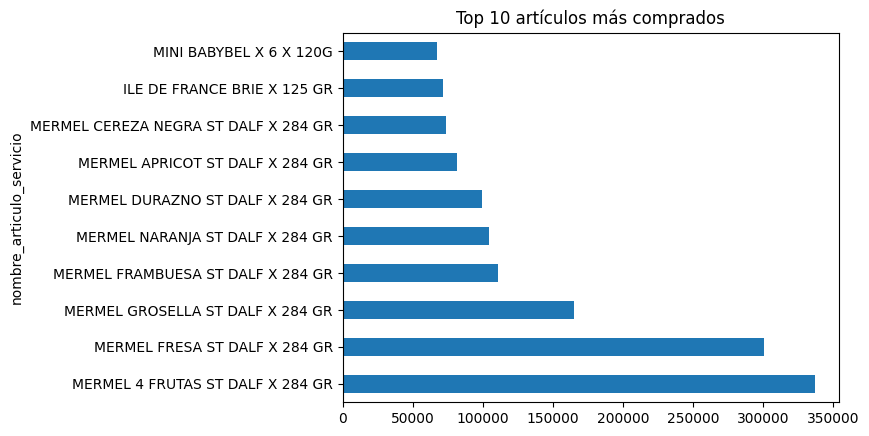

In [4]:
#Top 10 de los articulos mas comprados (por cantidad total)
df_compras_items.groupby('nombre_articulo_servicio')['cantidad'].sum()\
    .sort_values(ascending=False).head(10).plot(kind='barh', title='Top 10 artículos más comprados')



### 📈 Evolución mensual del valor total de compras

Este gráfico representa la evolución del valor total de compras mensuales a lo largo del tiempo, considerando los datos consolidados desde 2019 hasta 2025.

---

#### 🔍 ¿Qué realiza este análisis?

1. **Transformación temporal**:
   - Se extrae el mes de la fecha de cada compra utilizando `to_period('M')`.

2. **Agrupación mensual**:
   - Se agrupan los datos por mes y se suma el valor total de las compras (`subtotal`) realizadas en ese periodo.

3. **Visualización de la tendencia**:
   - Se genera un gráfico de línea que permite observar la evolución del gasto mensual a lo largo del tiempo.

---

#### 📊 ¿Qué revela el gráfico?

- Se observan **fluctuaciones mensuales importantes**, lo que puede indicar comportamientos estacionales, cambios en demanda o efectos externos (como promociones o coyunturas económicas).
- Hay **picos puntuales** con valores significativamente más altos, lo cual puede ser clave para identificar periodos de alta demanda o compras corporativas masivas.
- La visualización también ayuda a identificar posibles **anomalías** o caídas abruptas que podrían ser investigadas más a fondo.

---

#### ✅ ¿Por qué es útil este análisis?

- Permite entender la **tendencia histórica** del comportamiento de compras.
- Ayuda a tomar decisiones sobre **inventario, abastecimiento y proyecciones** futuras.
- Facilita el diseño de estrategias comerciales basadas en los **ciclos de mayor y menor volumen** de compra.

Este tipo de análisis es fundamental para una visión ejecutiva y predictiva del negocio, apoyando tanto al equipo financiero como al operativo.



<Axes: title={'center': 'Evolución del valor total de compras mensuales'}, xlabel='mes'>

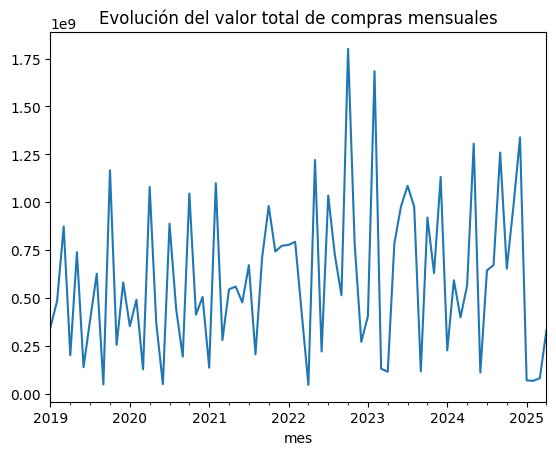

In [5]:
#Evolucin mensual del valor total de compras 
df_compras_items['mes'] = df_compras_items['defecha'].dt.to_period('M')
df_compras_items.groupby('mes')['subtotal'].sum().plot(kind='line', title='Evolución del valor total de compras mensuales')


<Axes: title={'center': 'Top 10 proveedores con más compras registradas'}, ylabel='cod_cliente'>

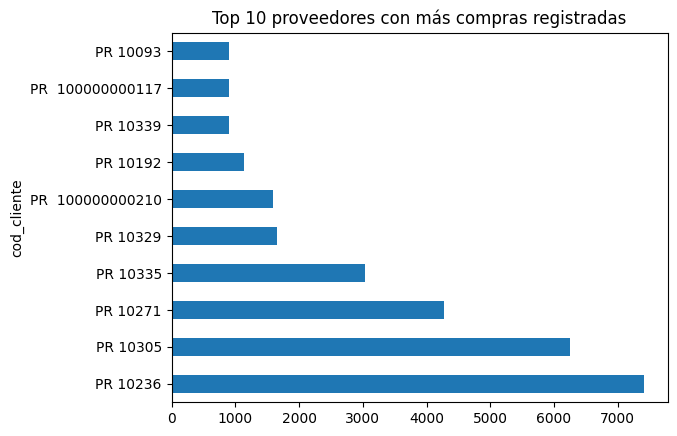

In [6]:
#Particiacion de proveedores (por codigo de cliente)
df_compras_items['cod_cliente'].value_counts().head(10).plot(kind='barh', title='Top 10 proveedores con más compras registradas')


### 🔄 Identificación de devoluciones o notas crédito (compras con valores negativos)

Este análisis tiene como objetivo detectar movimientos que representen **devoluciones**, **ajustes contables** o **notas crédito**, los cuales se evidencian mediante valores negativos en la cantidad comprada dentro del histórico de compras (`cantidad < 0`).

---

#### 🔍 ¿Qué hace este filtro?

- Extrae todas las transacciones en donde la columna `'cantidad'` tiene un valor negativo.
- Estas filas representan devoluciones de productos, anulaciones o correcciones en compras previamente registradas.

---

#### 📌 ¿Qué revela la tabla?

- Se identificaron **290 registros** asociados a este tipo de operaciones.
- Algunos productos como `TORTA DE ALMOJABANA`, `YOGURTH GRIEGO PREMIUM` o `CREMA DE LECHE X 200 GR` presentan varias devoluciones por parte de distintos clientes.
- Se observan montos relevantes en las columnas `vrgravado` y `vrnogravado`, lo que implica impacto contable y tributario.

---

#### 🧠 ¿Por qué es relevante este análisis?

1. **Mejora el control de inventario**:
   - Permite auditar qué productos son más propensos a devoluciones.

2. **Optimiza la relación comercial**:
   - Identifica clientes con devoluciones frecuentes, lo que puede señalar problemas de calidad, logística o cumplimiento.

3. **Soporte para auditorías**:
   - Facilita la trazabilidad de ajustes contables frente a proveedores, clientes o entes reguladores.

---

Este análisis es clave para el equipo financiero, contable y de operaciones, ya que ayuda a mantener la integridad de los datos y a tomar decisiones basadas en historial real de devoluciones.


In [7]:
#Identificacion de devoluciones o notas credito asociado con valores negativos 
# Compras con valores negativos
df_compras_items[df_compras_items['cantidad'] < 0]


,cod_cliente,cliente,documento,defecha,cod_articulo_servicio,nombre_articulo_servicio,cantidad,porc_iva,vrgravado,vrnogravado,descuento,subtotal,tipodocumento,tipotercero,mes
5845,PR 100000000182,MOLINA URIBE VICTORIA EUGENIA,2 28,2019-01-02,100937,TORTA DE ALMOJABANA X UND,-10.0,0,0.00,-26000.0,0,-26000.00,D,Nacional,2019-01
5846,PR 100000000182,MOLINA URIBE VICTORIA EUGENIA,2 28,2019-01-02,100938,TORTA DE NARANJA CON AMAPOLA,-10.0,0,0.00,-26000.0,0,-26000.00,D,Nacional,2019-01
5847,PR 100000000182,MOLINA URIBE VICTORIA EUGENIA,2 28,2019-01-02,100933,TORTA DE ZANAHORIA,-10.0,0,0.00,-26000.0,0,-26000.00,D,Nacional,2019-01
5848,PR 100000000182,MOLINA URIBE VICTORIA EUGENIA,2 28,2019-01-02,100940,TORTA DE VINO,-1.0,0,0.00,-30000.0,0,-30000.00,D,Nacional,2019-01
5849,PR 100000000169,PRODUCTOS NATURALES DE LA SABANA SAS,1 448,2019-01-08,100442,CREMA DE LECHE X 200 GR,-1.0,0,0.00,-1840.0,0,-1840.00,D,Nacional,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40413,PR 100000000250,BOLSAS Y BOLSOS ECOLOGICOS SAS,1 559,2025-02-25,160215,BOLSAS GRANDE NEGRA THE WINE CELLAR,-100.0,0,0.00,-210100.0,0,-210100.00,D,Nacional,2025-02
40414,PR 10153,INDUSTRIA NACIONAL DE GASEOSAS S.A,1 561,2025-03-04,122346,GINGER SCHWEPPES ALE X 300ML,-1.0,19,-1921.00,0.0,0,-1921.00,D,Nacional,2025-03
40415,PR 10153,INDUSTRIA NACIONAL DE GASEOSAS S.A,1 562,2025-04-29,120789,COCACOLA ZERO X 300 ML,-12.0,19,-28235.00,0.0,0,-28235.00,D,Nacional,2025-04
40416,PR 10153,INDUSTRIA NACIONAL DE GASEOSAS S.A,1 562,2025-04-29,122342,AGUA MANANTIAL X 500 ML,-12.0,0,0.00,-30800.0,0,-30800.00,D,Nacional,2025-04


<Axes: title={'center': 'Total gravado vs no gravado'}>

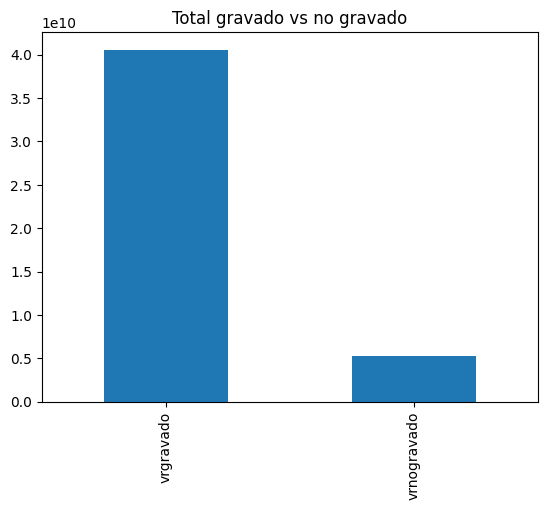

In [8]:
#Comparacion de valores entre el valor gravado vs no gravado 
df_compras_items[['vrgravado', 'vrnogravado']].sum().plot(kind='bar', title='Total gravado vs no gravado')


<Axes: title={'center': 'Artículos con mayor valor total comprado'}, ylabel='nombre_articulo_servicio'>

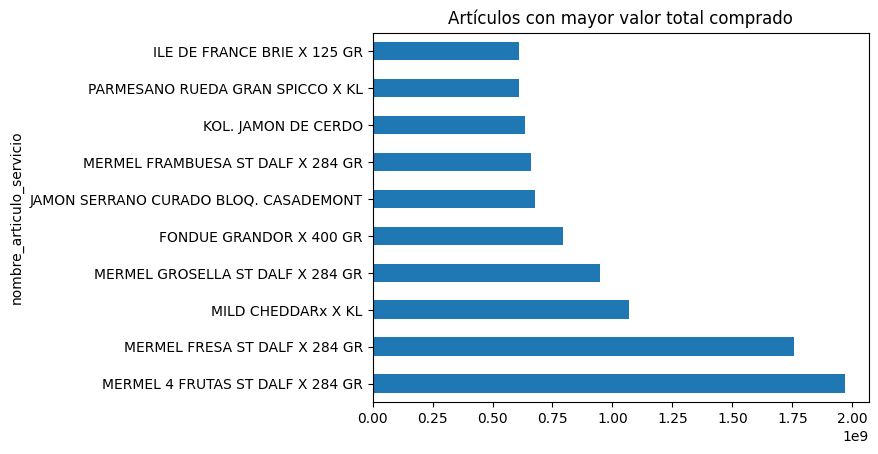

In [9]:
#Identificacion del top de articulos por subtotal 
df_compras_items.groupby('nombre_articulo_servicio')['subtotal'].sum()\
    .sort_values(ascending=False).head(10).plot(kind='barh', title='Artículos con mayor valor total comprado')


In [10]:
#Analisis de concentracion de compras para ver la concentracion en pocos articulos o proveedores
# % de compras acumulado por los 10 artículos más comprados
articulo_top = df_compras_items.groupby('nombre_articulo_servicio')['cantidad'].sum().sort_values(ascending=False)
articulo_top.cumsum() / articulo_top.sum()


nombre_articulo_servicio
MERMEL 4 FRUTAS ST DALF X 284 GR       0.066883
MERMEL FRESA ST DALF X 284 GR          0.126533
MERMEL GROSELLA ST DALF X 284 GR       0.159242
MERMEL FRAMBUESA ST DALF X 284 GR      0.181312
MERMEL NARANJA ST DALF X 284 GR        0.202026
                                         ...   
NLP. RON LA HECHICERA 700ML            1.000027
PRODUCTO NO GRAVADO PARA LA VTA        1.000027
MOR. CHOCO SANTA CLAUS HEIDEL X 85     1.000027
VINO NIETO RESERVA PINOT NOIR X 750    1.000020
BOLSAS GRANDE NEGRA THE WINE CELLAR    1.000000
Name: cantidad, Length: 2338, dtype: float64

### 📊 Análisis de Estacionalidad: Compras mensuales por año

Este análisis permite identificar patrones de compra recurrentes a lo largo del tiempo, evaluando cómo se distribuyen las compras mes a mes en cada año.

---

#### 🧾 ¿Qué hace el gráfico?

1. Agrupa la base de datos por `año` y `mes` usando la fecha de compra (`defecha`).
2. Calcula el subtotal total de compras para cada combinación año-mes.
3. Representa los resultados en un gráfico de barras apiladas (`stacked bar chart`) donde:
   - El eje X muestra los años.
   - El eje Y muestra el valor total de las compras.
   - Cada color representa un mes del año (leyenda de 1 a 12).

---

#### 📌 ¿Qué revela el gráfico?

- Se observan picos de compras en ciertos meses específicos, lo cual puede evidenciar estacionalidades o campañas promocionales.
- Años como 2022, 2023 y 2024 presentan un volumen significativamente mayor que los anteriores, indicando crecimiento o más cobertura de datos.
- En años recientes se percibe una mayor consistencia mensual, reflejando estabilidad operativa o consolidación de proveedores.

---

#### 🎯 ¿Por qué es útil este análisis?

1. **Planeación de compras e inventario**: permite prever meses de alta demanda y prepararse logísticamente.
2. **Toma de decisiones estratégicas**: ayuda a programar campañas o reforzar abastecimiento en temporadas clave.
3. **Evaluación de crecimiento**: permite comparar la evolución del gasto anual y su distribución temporal.

---

Este gráfico es una herramienta visual poderosa para equipos de compras, finanzas y logística, ya que facilita decisiones basadas en datos históricos y en patrones repetitivos de comportamiento del gasto.


<Axes: title={'center': 'Compras mensuales por año'}, xlabel='año'>

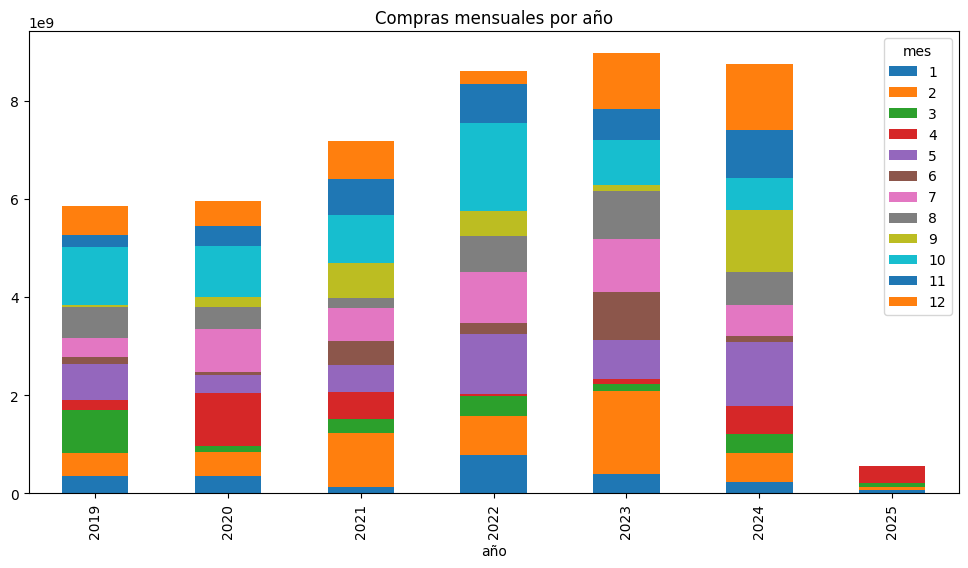

In [11]:
#Analisis presentado por temporalidad de compras para identificar estacionalidades
df_compras_items['año'] = df_compras_items['defecha'].dt.year
df_compras_items['mes'] = df_compras_items['defecha'].dt.month

df_compras_items.groupby(['año', 'mes'])['subtotal'].sum().unstack().plot(kind='bar', stacked=True, figsize=(12,6), title='Compras mensuales por año')


In [12]:
#Analisis de descuentos aplicados
df_compras_items[df_compras_items['descuento'] > 0]['descuento'].describe()


count      1139.000000
mean       7064.175593
std       16209.078538
min          37.000000
25%        2134.500000
50%        3533.000000
75%        6111.000000
max      317044.000000
Name: descuento, dtype: float64

<Axes: title={'center': 'Ticket promedio por proveedor (Top 10)'}, ylabel='cliente'>

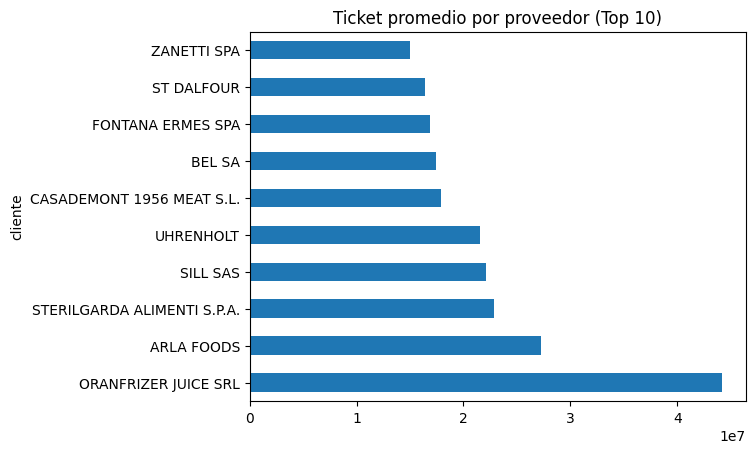

In [13]:
#Analisis de ticket promedio por proveedor
ticket_promedio = df_compras_items.groupby('cliente')['subtotal'].mean().sort_values(ascending=False).head(10)
ticket_promedio.plot(kind='barh', title='Ticket promedio por proveedor (Top 10)')


In [17]:
pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


### 🧪 Análisis de Valores Extremos en Subtotales de Compra

Este análisis tiene como objetivo identificar la presencia de valores atípicos (outliers) en la columna `subtotal`, que representa el valor total por línea de ítem en las compras.

---

#### 🔍 ¿Qué hace este gráfico?

1. Se construye un **boxplot** (diagrama de caja) a partir de los valores de `subtotal`.
2. El gráfico visualiza:
   - El rango intercuartílico (IQR).
   - Los valores mínimo, máximo y la mediana.
   - Los valores extremos (outliers) fuera del rango esperado.

---

#### ⚠️ ¿Qué revela?

- Existen múltiples valores extremos con subtotales muy elevados, alejados del rango central de la mayoría de datos.
- La distribución de subtotales está altamente sesgada a la derecha (long tail), lo que puede deberse a:
  - Compras institucionales de gran volumen.
  - Errores de carga o facturación.
  - Notas de crédito o documentos anulados.

---

#### 🎯 ¿Por qué es importante?

1. **Control de calidad de datos**: permite detectar errores que pueden sesgar análisis posteriores.
2. **Segmentación de compras**: los outliers pueden ser analizados por separado para entender compras especiales o comportamientos atípicos.
3. **Toma de decisiones robusta**: conocer los extremos evita que influyan indebidamente en métricas agregadas como el promedio.

---

Este tipo de visualización es fundamental para la limpieza de datos y para definir políticas de tratamiento de valores anómalos antes de aplicar modelos o generar reportes consolidados.


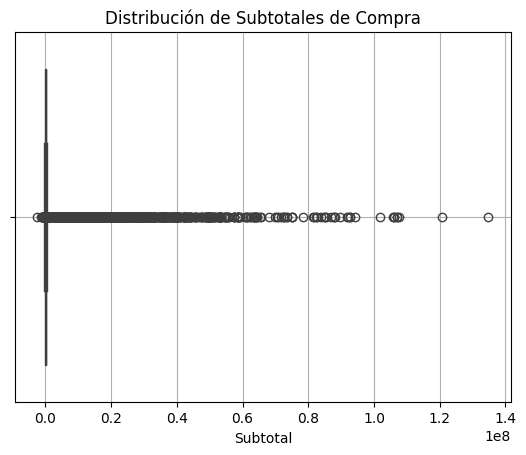

In [19]:
#Analisis de valores extremos 
# Análisis de valores extremos en el subtotal
sns.boxplot(x=df_compras_items['subtotal'])
plt.title('Distribución de Subtotales de Compra')
plt.xlabel('Subtotal')
plt.grid(True)
plt.show()



### 📊 Relación entre Cantidad Comprada y Subtotal

Este gráfico busca analizar si existe una correlación entre la **cantidad comprada** de un ítem y el **subtotal** asociado a dicha compra. Para ello se utiliza un **gráfico de dispersión** (scatterplot), ideal para visualizar relaciones lineales o patrones generales entre dos variables numéricas.

---

#### 🔍 ¿Qué observamos?

1. Se visualiza una alta concentración de puntos en el rango bajo de cantidades (menor a 10,000 unidades).
2. A medida que aumenta la cantidad comprada, también tiende a aumentar el subtotal, lo cual es esperable.
3. Existen valores atípicos (outliers) con subtotales muy altos para cantidades pequeñas, lo cual puede ser:
   - Errores en la digitación de precios.
   - Artículos de muy alto valor unitario.
   - Compras institucionales excepcionales.

---

#### 🧠 ¿Qué podemos concluir?

- Hay una **relación positiva general** entre cantidad y subtotal, pero no estrictamente lineal, ya que el precio unitario puede variar por ítem.
- Es necesario un análisis adicional para entender los casos extremos:
  - ¿Corresponden a productos premium?
  - ¿Hay descuentos por volumen?
  - ¿Existen errores de facturación?

---

Este gráfico es útil para validar la coherencia entre cantidades y montos pagados, así como para detectar **comportamientos anómalos** que ameriten revisión en el proceso comercial o contable.


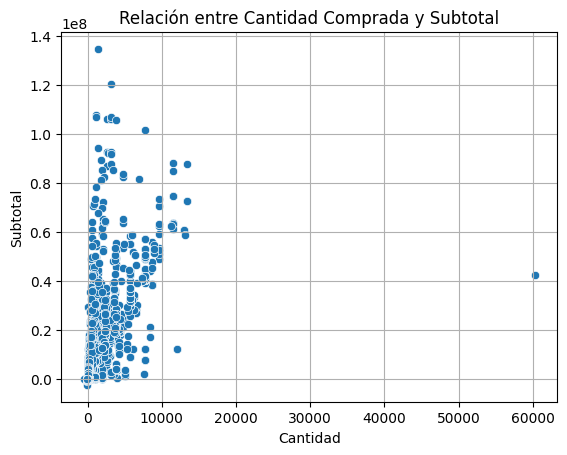

In [20]:
# Relación entre cantidad comprada y el subtotal
sns.scatterplot(data=df_compras_items, x='cantidad', y='subtotal')
plt.title('Relación entre Cantidad Comprada y Subtotal')
plt.xlabel('Cantidad')
plt.ylabel('Subtotal')
plt.grid(True)
plt.show()


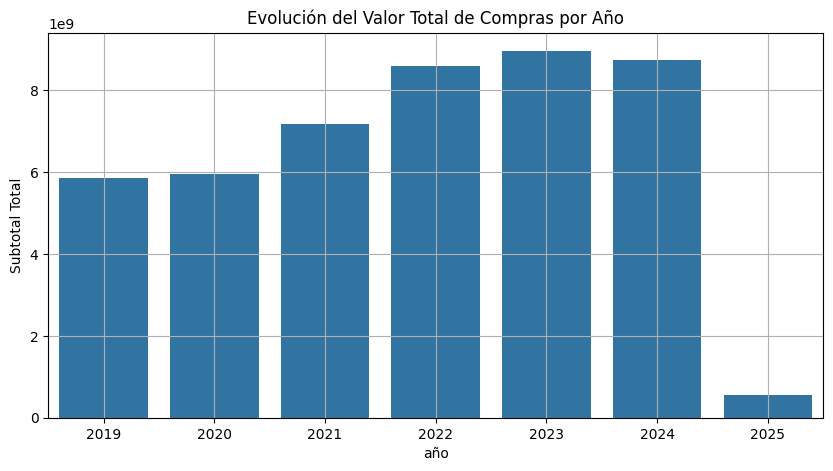

In [21]:
#Tendencia de compras a lo largo del tiempo
df_compras_items['año'] = df_compras_items['defecha'].dt.year
compras_por_año = df_compras_items.groupby('año')['subtotal'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=compras_por_año, x='año', y='subtotal')
plt.title('Evolución del Valor Total de Compras por Año')
plt.ylabel('Subtotal Total')
plt.grid(True)
plt.show()


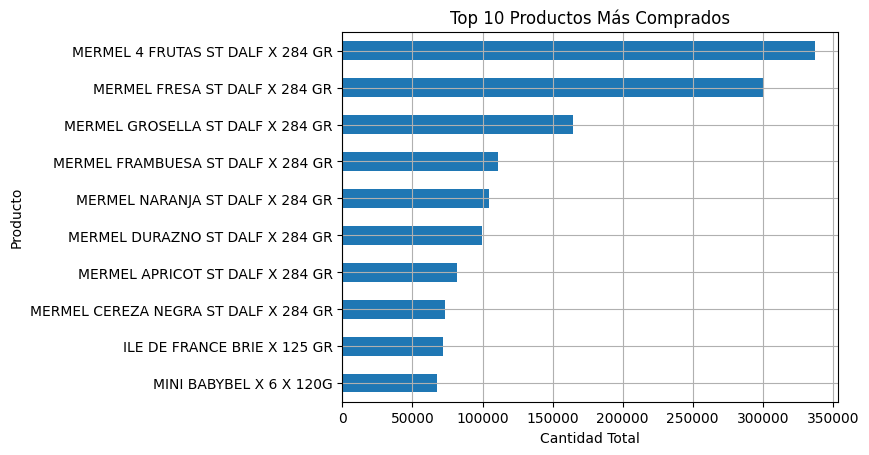

In [22]:
#Identificacion del top 10 de productos mas comprados (por cantidad)
top_productos = df_compras_items.groupby('nombre_articulo_servicio')['cantidad'].sum().nlargest(10)

top_productos.plot(kind='barh', title='Top 10 Productos Más Comprados')
plt.xlabel('Cantidad Total')
plt.ylabel('Producto')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


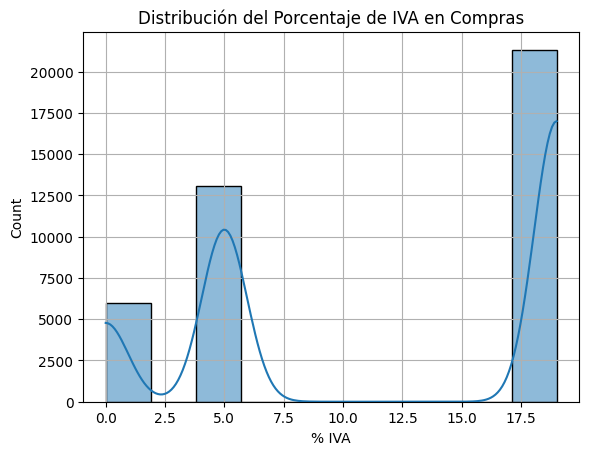

In [23]:
#Distribucion del % de IVA en las compras
sns.histplot(df_compras_items['porc_iva'], bins=10, kde=True)
plt.title('Distribución del Porcentaje de IVA en Compras')
plt.xlabel('% IVA')
plt.grid(True)
plt.show()


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2626/1900438133.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=compras_por_año, x='año', y='subtotal', palette='viridis')
/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2626/1900438133.py:21: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) Arial.
  plt.tight_layout()
/Users/juanpardo/.pyenv/versions/3.10.14/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


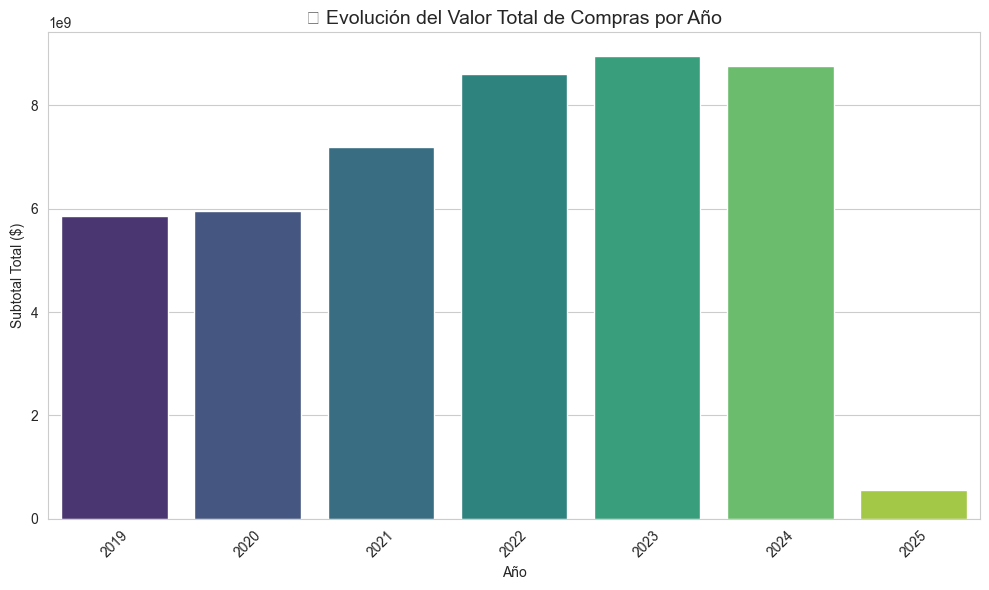

In [24]:
#Evolucion del total de compras por año
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que la fecha esté en datetime
df_compras_items['defecha'] = pd.to_datetime(df_compras_items['defecha'])
df_compras_items['año'] = df_compras_items['defecha'].dt.year

# Agrupación
compras_por_año = df_compras_items.groupby('año')['subtotal'].sum().reset_index()

# Estética de gráfico
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.barplot(data=compras_por_año, x='año', y='subtotal', palette='viridis')

# Títulos y etiquetas
plt.title('🧾 Evolución del Valor Total de Compras por Año', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Subtotal Total ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar
plt.show()
